In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
import os
from IPython.display import Image, display
import PIL
from PIL import Image
import cv2
%matplotlib inline

[119.09338521400778, 100.0, 827, 80, 85.685647512915736]

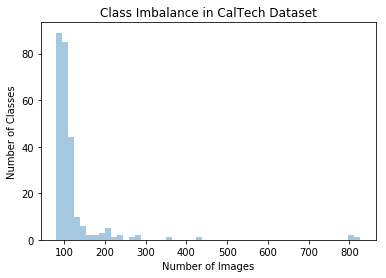

In [106]:
def getClassDistribution(dir_):
    '''
    Gets the distributions for each class
    '''
    counts = [len(os.listdir(dir_+x)) for x in os.listdir(dir_)[1:]]
    sns.distplot(counts,kde=False)
    plt.xlabel('Number of Images')
    plt.ylabel('Number of Classes')
    plt.title('Class Imbalance in CalTech Dataset')
    return [np.mean(counts),np.median(counts),max(counts),min(counts),np.std(counts)]

getClassDistribution('256_ObjectCategories/')

## Choosing the Right Clustering Algorithm

In [66]:
def clusterReport(data,max_clusters,clusterAlgo,legendLabel):
    '''
    INPUT: 
    data - a ndarray/dataframe of data
    max_clusters - int, the maximum number of clusters for the report
    clusterAlgo - The clustering algorithm
    
    OUTPUT:
    visualizations - A set of visualizations based on clustering metrics I have not defined yet.
    '''
    
    # metrics: sc
    scores = []
    
    for i in range(2,max_clusters+1):
        model = clusterAlgo(n_clusters=i)
        labels = model.fit_predict(data)
        scores.append(silhouette_score(X=data,labels=labels))
    sns.lineplot(x=list(range(2,max_clusters+1)),y=scores,label=legendLabel)

def createReports(dir_,max_clusters,algos):
    '''
    Creates the reports based on the datasets and the algorithms.
    '''
    for file in os.listdir(dir_):
        plt.figure()
        for algo in algos:
            print(file,str(algo).split('.')[-1][:-2])
            clusterReport(pd.read_csv(dir_+file).drop('filename',axis=1),max_clusters,algo,str(algo).split('.')[-1][:-2])
        plt.title(file.split('_')[1])
        plt.legend()

def getClusterDistribution(data,k):
    '''
    Using K-Means, returns the cluster distribution for the dataset. We will use this to understand the cluster
    distributions, which will allow us to get a better understanding of what the clusters will look like.
    We also will surface the clusters in 2D as well for initial exploratory analysis.
    '''
    
    # get cluster labels
    kmeans = KMeans(n_clusters=k)
    results = kmeans.fit_predict(data)
    
    # create bar chart
    labels, frequency = np.unique(results,return_counts=True)
    sns.barplot(x=labels,y=frequency)
    
    # create cluster viz
    # TODO
        

test_layer18_output.csv KMeans
test_layer18_output.csv AgglomerativeClustering
test_layer27_output.csv KMeans
test_layer27_output.csv AgglomerativeClustering
test_layer36_output.csv KMeans
test_layer36_output.csv AgglomerativeClustering
test_layer4_output.csv KMeans
test_layer4_output.csv AgglomerativeClustering
test_layer9_output.csv KMeans
test_layer9_output.csv AgglomerativeClustering


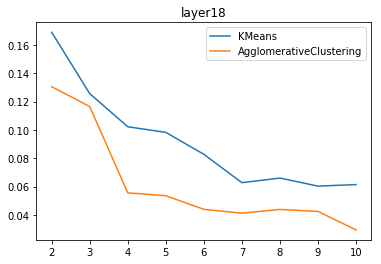

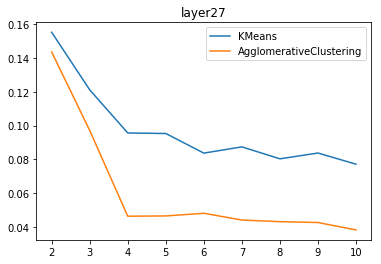

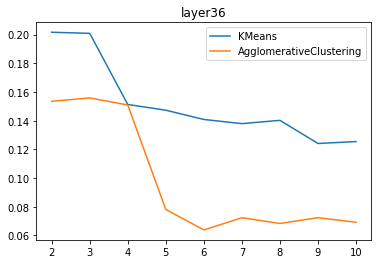

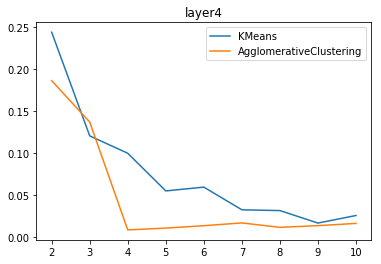

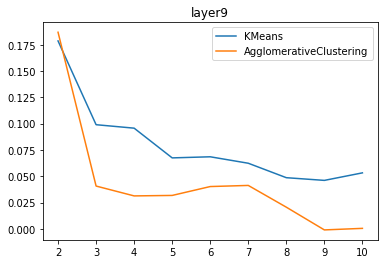

In [4]:
createReports('intermediate_layer_outputs/',10,[KMeans,AgglomerativeClustering])

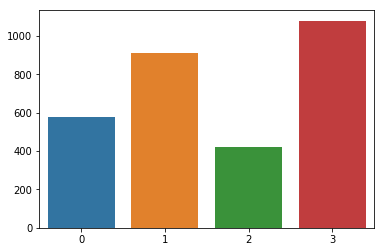

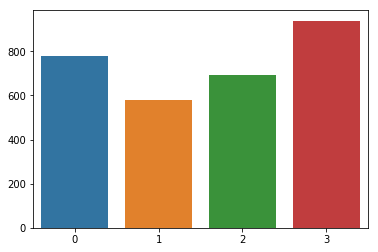

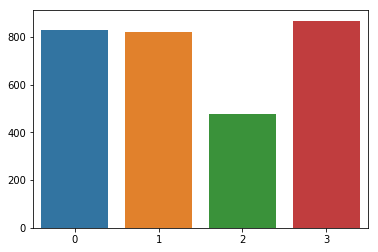

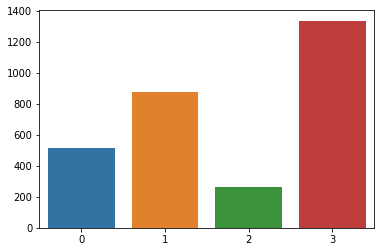

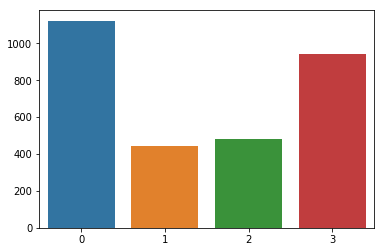

In [68]:
files = os.listdir('intermediate_layer_outputs/')
clusters = 4
for i in range(len(files)):
    plt.figure()
    getClusterDistribution(pd.read_csv('intermediate_layer_outputs/'+files[i]).drop('filename',axis=1),clusters)
        

## Clustering Analysis

In [50]:
def getClasses(dir_):
    '''
    Using the original 256 categories dataset get the class names.
    '''
    
    return pd.DataFrame([[str(int(x.split('.')[0])),x.split('.')[1]] for x in os.listdir(dir_)[1:]],columns=['class','className'])

classMap = getClasses('256_ObjectCategories/')

In [165]:
classMap.to_csv('classMapping.csv',index=False)

In [171]:
{int(classMap.iloc[i]['class']):classMap.iloc[i]['className'] for i in range(len(classMap))}

{1: 'ak47',
 2: 'american-flag',
 3: 'backpack',
 4: 'baseball-bat',
 5: 'baseball-glove',
 6: 'basketball-hoop',
 7: 'bat',
 8: 'bathtub',
 9: 'bear',
 10: 'beer-mug',
 11: 'billiards',
 12: 'binoculars',
 13: 'birdbath',
 14: 'blimp',
 15: 'bonsai-101',
 16: 'boom-box',
 17: 'bowling-ball',
 18: 'bowling-pin',
 19: 'boxing-glove',
 20: 'brain-101',
 21: 'breadmaker',
 22: 'buddha-101',
 23: 'bulldozer',
 24: 'butterfly',
 25: 'cactus',
 26: 'cake',
 27: 'calculator',
 28: 'camel',
 29: 'cannon',
 30: 'canoe',
 31: 'car-tire',
 32: 'cartman',
 33: 'cd',
 34: 'centipede',
 35: 'cereal-box',
 36: 'chandelier-101',
 37: 'chess-board',
 38: 'chimp',
 39: 'chopsticks',
 40: 'cockroach',
 41: 'coffee-mug',
 42: 'coffin',
 43: 'coin',
 44: 'comet',
 45: 'computer-keyboard',
 46: 'computer-monitor',
 47: 'computer-mouse',
 48: 'conch',
 49: 'cormorant',
 50: 'covered-wagon',
 51: 'cowboy-hat',
 52: 'crab-101',
 53: 'desk-globe',
 54: 'diamond-ring',
 55: 'dice',
 56: 'dog',
 57: 'dolphin-101'

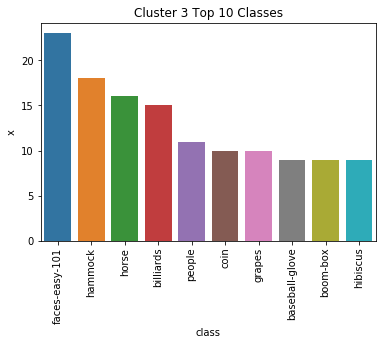

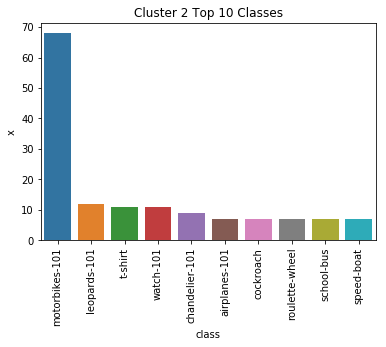

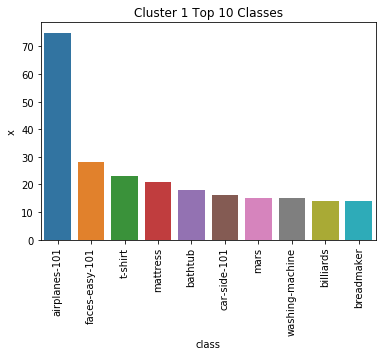

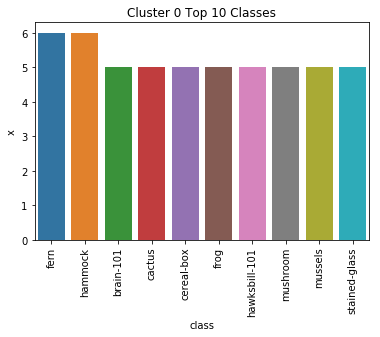

In [57]:
def getTop10(dataset,mapping):
    dataset['class'] = dataset['filename'].str.split('/').apply(lambda x: x[1])
    dataset = dataset.merge(mapping,how='left',on='class').drop('class',axis=1).rename({'className':'class'},axis=1)
    grouped = dataset.groupby(['CLUSTER','class']).count()['x'].reset_index().sort_values(['CLUSTER','x'],ascending=False)
    clusters = grouped['CLUSTER'].unique()
    for cluster in clusters:
        counts = grouped.loc[grouped['CLUSTER']==cluster].head(10)
        plt.figure()
        g=sns.barplot(data=counts,x='class',y='x',order=counts[['class','x']].sort_values('x',ascending=False)['class'])
        g.set_xticklabels(rotation=90,labels=counts[['class','x']].sort_values('x',ascending=False)['class'])
        plt.title(f'Cluster {cluster} Top 10 Classes')
getTop10(pd.read_json('D3_inputs/test_layer4.json'),classMap)

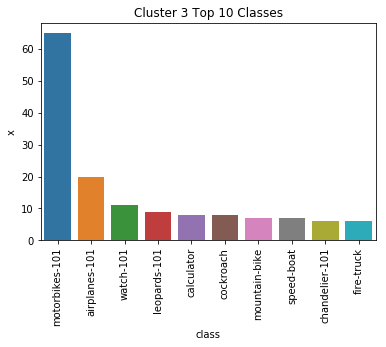

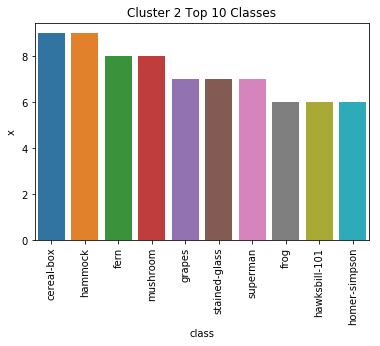

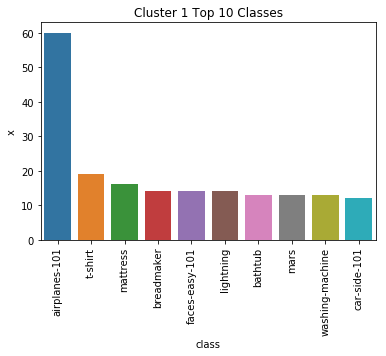

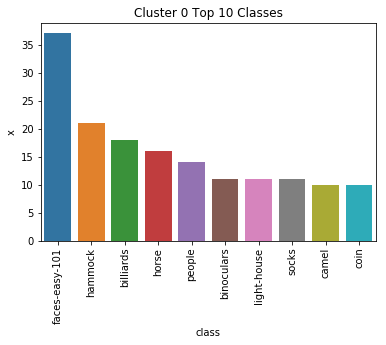

In [69]:
getTop10(pd.read_json('D3_inputs/test_layer9.json'),classMap)

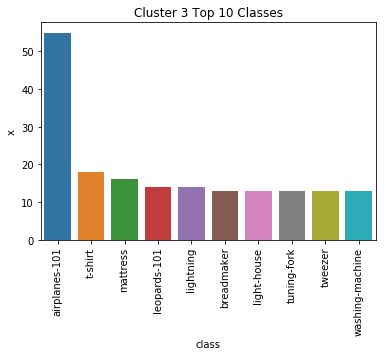

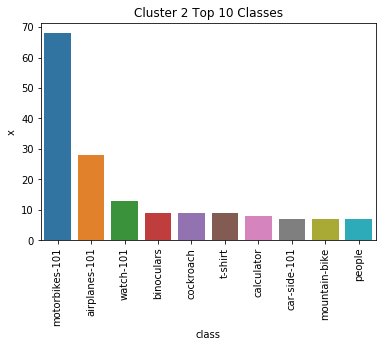

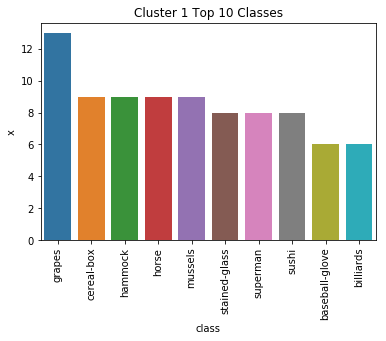

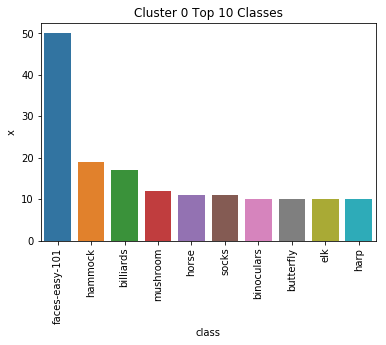

In [62]:

getTop10(pd.read_json('D3_inputs/test_layer18.json'),classMap)


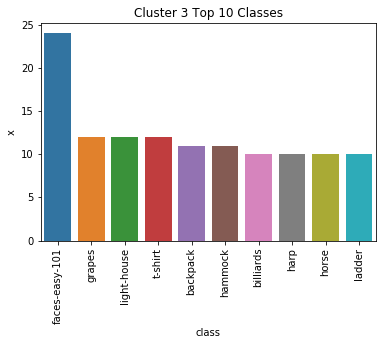

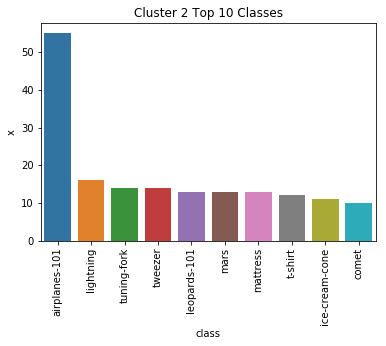

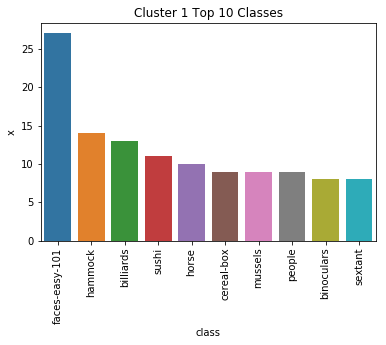

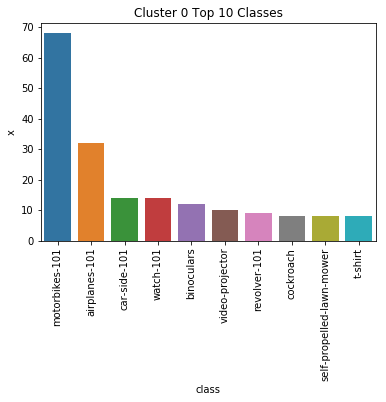

In [63]:
getTop10(pd.read_json('D3_inputs/test_layer27.json'),classMap)


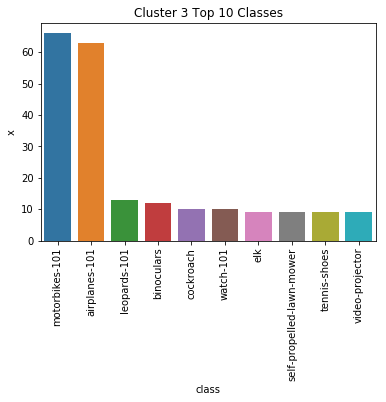

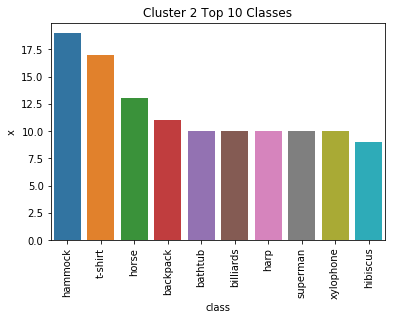

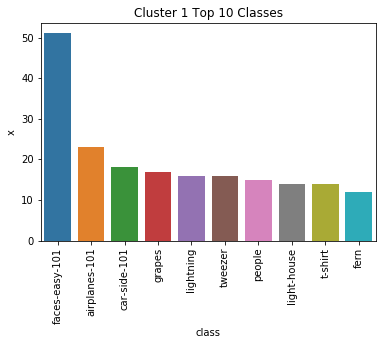

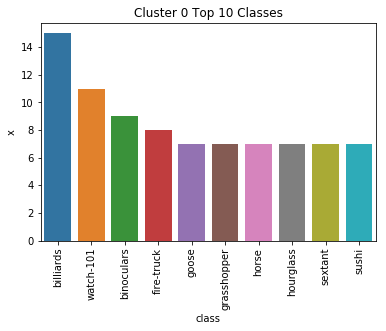

In [64]:
getTop10(pd.read_json('D3_inputs/test_layer36.json'),classMap)

In [9]:
def getTopNImages(dataset,n):
    '''
    Compute cluster center using x,y coordinates
    Get top 10 images nearest to cluster center
    Get random 10 images.
    '''
    dataCopy = dataset.copy(deep=True)
    centers = dataCopy.groupby('CLUSTER').mean().reset_index().rename(columns={'x':'x_center','y':'y_center'})
    
    dataCopy = dataCopy.merge(centers,how='left',on='CLUSTER')
    dataCopy['Distance'] = np.sqrt((dataCopy['x']-dataCopy['x_center'])**2 + (dataCopy['y']-dataCopy['y_center'])**2)
    clusters = []
    for center in centers['CLUSTER']:
        subset = dataCopy.loc[dataCopy['CLUSTER']==center]
        subset = subset.sort_values('Distance')['filename'].head(n).values
        clusters.append(subset)
    return clusters


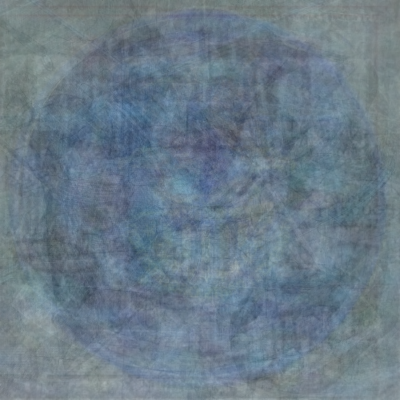

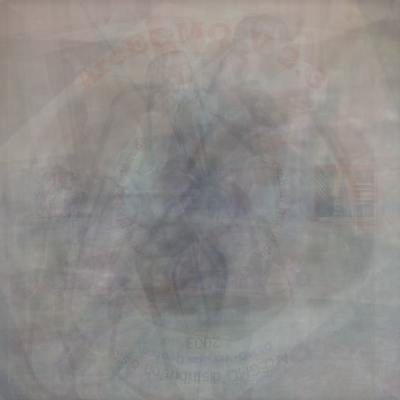

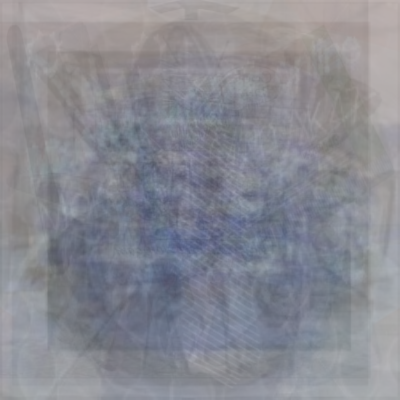

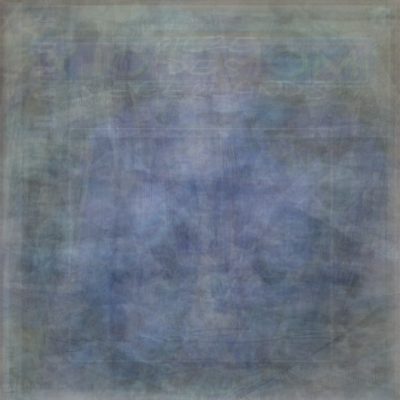

In [15]:
def getMeanImages(dataset):
    clusters = getTopNImages(dataset,25)
    for cluster in clusters:
        meanImage = np.round(np.mean([cv2.resize(cv2.imread(file),(400,400)) for file in cluster],axis=0)).astype(np.uint8)
        out=Image.fromarray(meanImage,mode="RGB")
        display(out)
        
        
getMeanImages(pd.read_json('D3_inputs/test_layer4.json'))

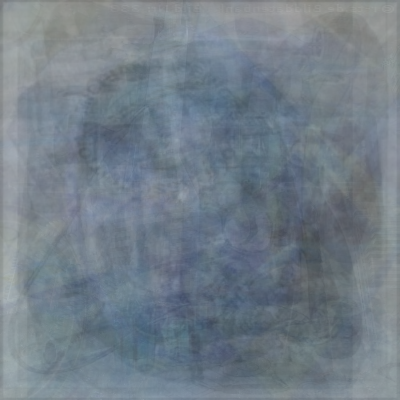

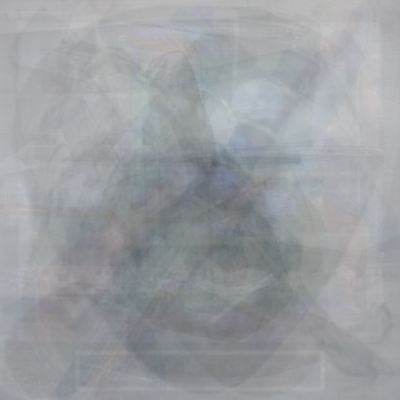

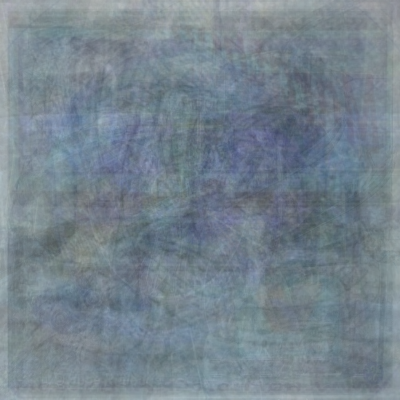

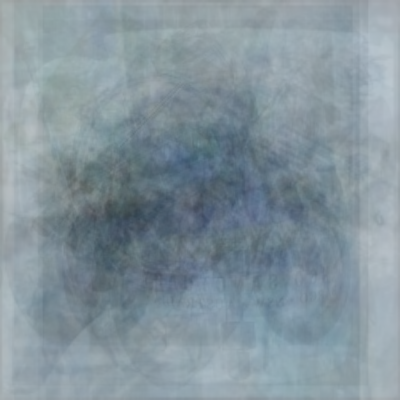

In [16]:
getMeanImages(pd.read_json('D3_inputs/test_layer9.json'))

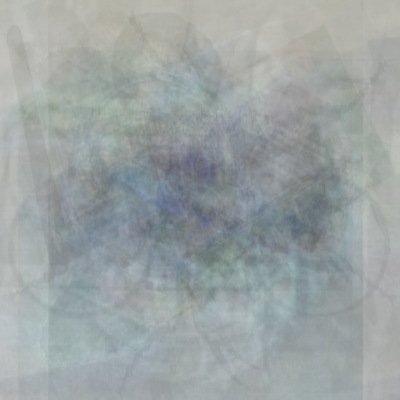

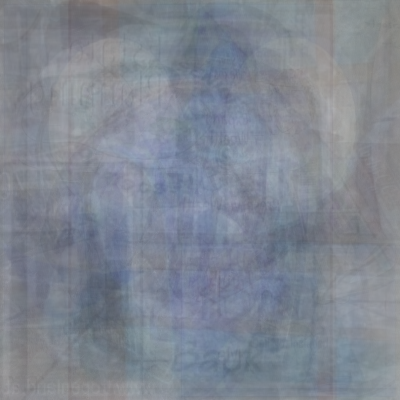

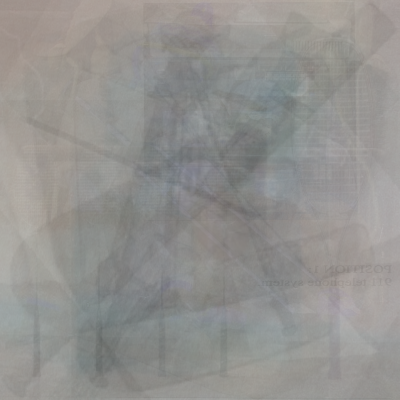

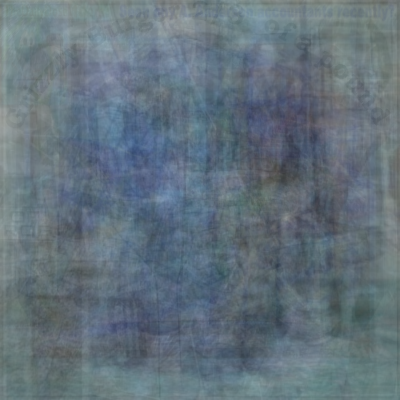

In [17]:
getMeanImages(pd.read_json('D3_inputs/test_layer18.json'))

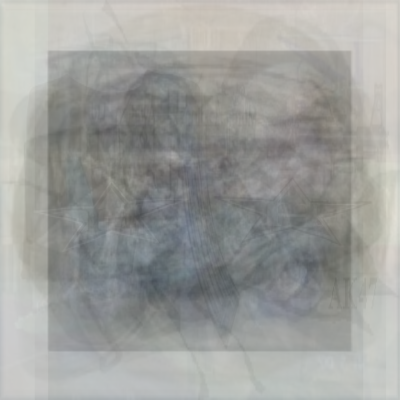

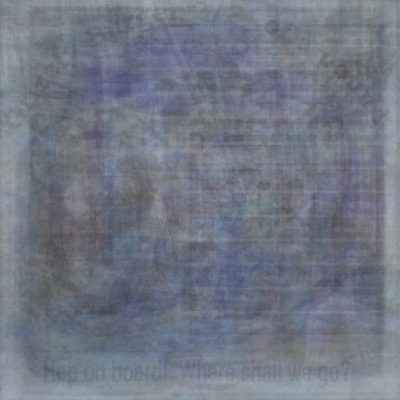

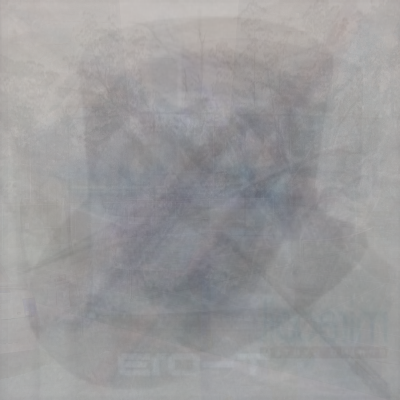

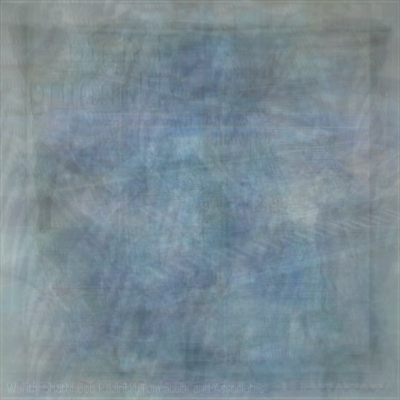

In [18]:
getMeanImages(pd.read_json('D3_inputs/test_layer27.json'))

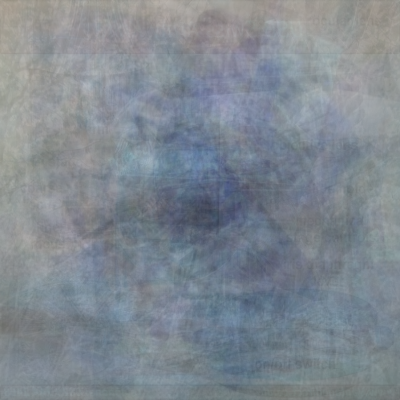

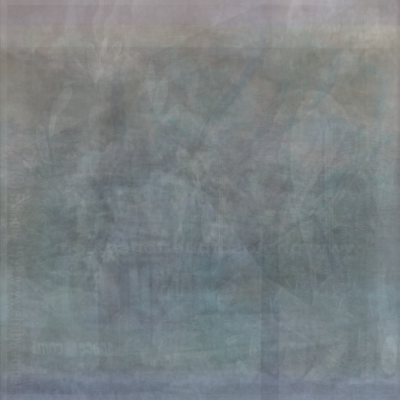

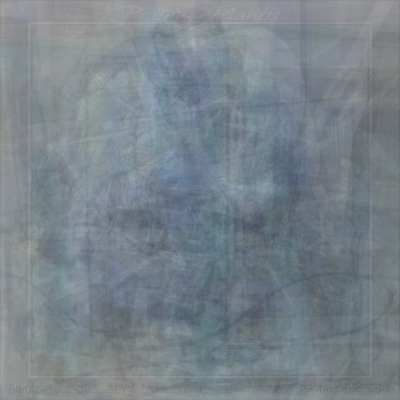

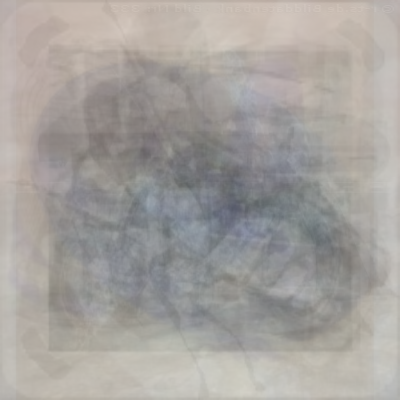

In [19]:
getMeanImages(pd.read_json('D3_inputs/test_layer36.json'))